In [16]:
import numpy as np
from obspy.core import Stream
from obspy import UTCDateTime
from obspy.signal.rotate import rotate_ne_rt
from telewavesim import utils as ut
from telewavesim import wiggle as wg
from telewavesim.utils import Model
import os, glob, time
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [27]:
modfile = './TwoLayer.txt'
wvtype = 'SV'

##-----------create waveform
wvtype = 'SV'
npts = 3600 # Number of samples
dt = 0.05   # Sample distance in seconds
slow = 0.04 # Horizontal slowness (or ray parameter) in s/km 
baz = 270

In [28]:
def create_st(timedir,model,slow,npts,dt,baz,wvtype):
    # Calculate the plane wave seismograms
    trxyz = ut.run_plane(model, slow, npts, dt, baz, wvtype=wvtype)
    # Creat dir to save trace 
    TraceDir = f'Model_mseed/{timedir}'
    if not os.path.isdir(TraceDir):
        os.makedirs(TraceDir)
    # Extract East, North and Vertical
    trxyz[0].stats.starttime = UTCDateTime(timedir)
    trxyz[1].stats.starttime = UTCDateTime(timedir)
    trxyz[2].stats.starttime = UTCDateTime(timedir)
    ntr = trxyz[0]
    etr = trxyz[1]
    ztr = trxyz[2]
    ntr.write(f'{TraceDir}/XX.MOD..HHN.mseed', format="MSEED")
    etr.write(f'{TraceDir}/XX.MOD..HHE.mseed', format="MSEED")
    ztr.write(f'{TraceDir}/XX.MOD..HHZ.mseed', format="MSEED")

    # print('====================finish')
    return trxyz
    

In [29]:
model = ut.read_model(modfile)

In [20]:
model.isoflg

['iso', 'tri', 'iso', 'iso']

In [30]:
model = ut.read_model(modfile)

t1 = ut.calc_ttime(model, slow, wvtype=wvtype)
print('Predicted propagation time from model: {0:4.1f} sec'.format(t1))


nowtime = UTCDateTime()+8*3600 
timedir = f'{nowtime.year}{str(nowtime.month).zfill(2)}{str(nowtime.day).zfill(2)}_{str(nowtime.hour).zfill(2)}{str(nowtime.minute).zfill(2)}{str(nowtime.second).zfill(2)}'
print(f'============================= {timedir}')  

trxyz = create_st(timedir,model,slow,npts,dt,baz,wvtype)    
    

    

Predicted propagation time from model: 47.6 sec
============================= 20221114_104127


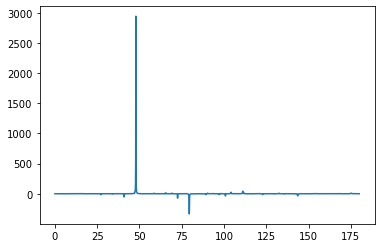

In [14]:
import matplotlib.pyplot as plt
plt.plot(trxyz[1].times(), trxyz[1].data)

In [ ]:
import 